In [1]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd
df = pd.read_csv('laptops_10.csv', encoding = 'windows-1251')
df.head(5)

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


#### 1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib

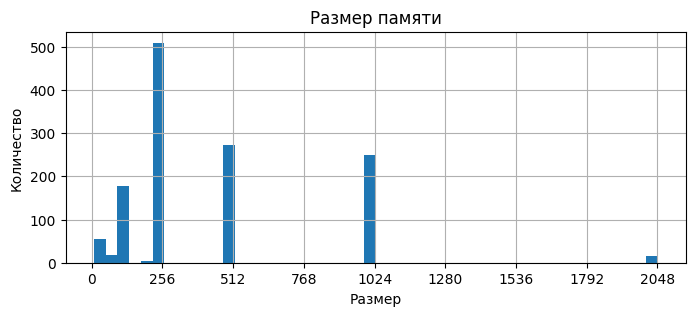

In [5]:
plt.figure(figsize=(8, 3))
plt.hist(df['Memory_Amount'], bins=48)
plt.title('Размер памяти')
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.grid()
plt.xticks(range(0, 2050, 256));

#### 1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib

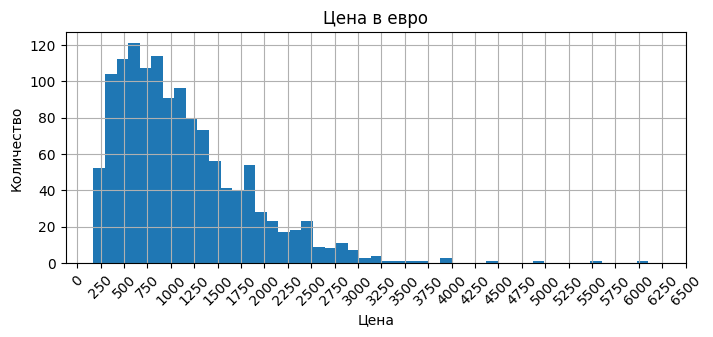

In [6]:
plt.figure(figsize=(8, 3))
plt.hist(df['Price_euros'], bins=48)
plt.title('Цена в евро')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.grid();
plt.xticks(range(0, 6700, 250), rotation=45);

#### 1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib
Постройте график;
Назовите график;
Сделайте именование оси x и оси y

In [7]:
df['Weight'].value_counts()

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: Weight, Length: 171, dtype: int64

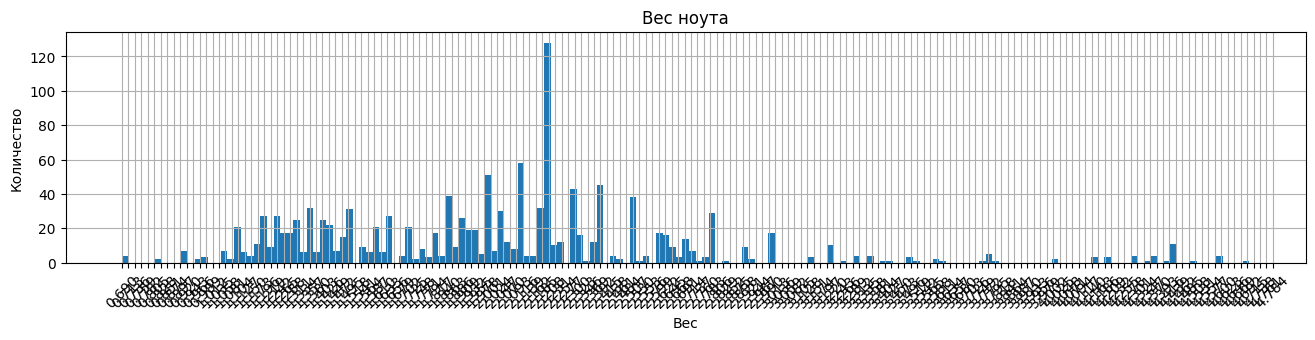

In [8]:
plt.figure(figsize=(16, 3))
plt.hist(df['Weight'], bins=171)
plt.title('Вес ноута')
plt.xlabel('Вес')
plt.ylabel('Количество')
plt.grid()
plt.xticks(np.arange(0.69, 4.8, 0.023), rotation=45);

#### 2.1 Изучите распределение типов носителя (Memory_Type)

In [9]:
data = df['Memory_Type'].value_counts()
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

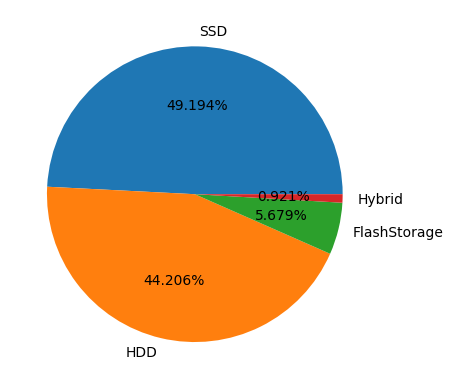

In [10]:
plt.pie(data, labels=data.index, autopct='%.3f%%');

#### 2.2 Изучите распределение компаний производителей (Company)

In [11]:
data = df['Company'].value_counts()
data

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

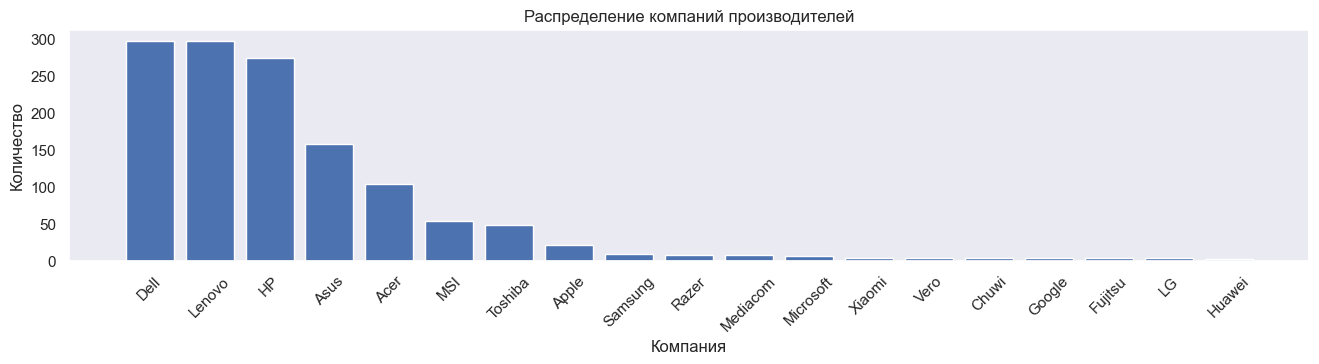

In [12]:
sns.set(rc={'figure.figsize': (16, 3)})
plt.bar(data.index, data)
plt.title('Распределение компаний производителей')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.grid()
plt.xticks(rotation=45);

#### 2.3 Изучите распределение операционной системы (OpSys)

In [13]:
data = df['OpSys'].value_counts()
data

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

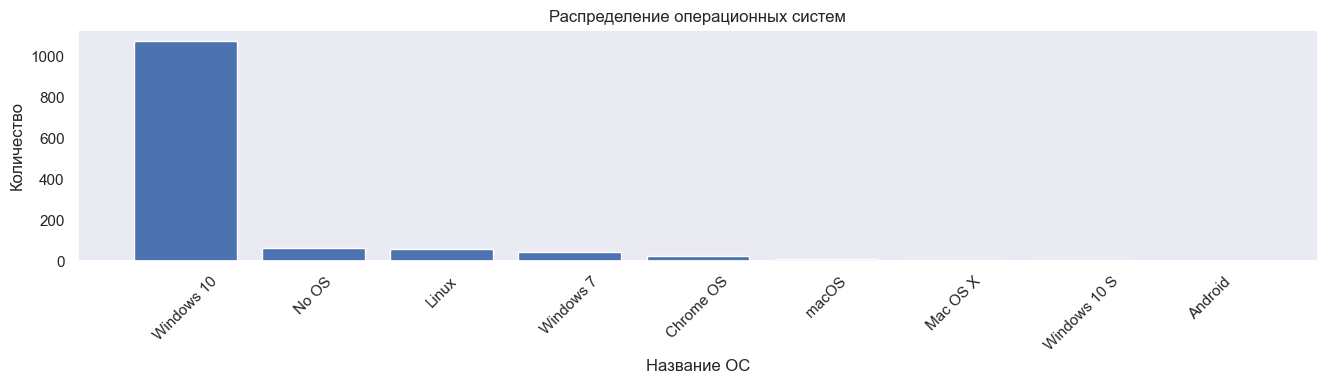

In [14]:
plt.bar(data.index, data)
plt.title('Распределение операционных систем')
plt.xlabel('Название ОС')
plt.ylabel('Количество')
plt.grid()
plt.xticks(rotation=45);

#### 2.4 Изучите распределение компаний производителей CPU (Cpu_Company)

In [15]:
data = df['Cpu_Company'].value_counts()
data

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

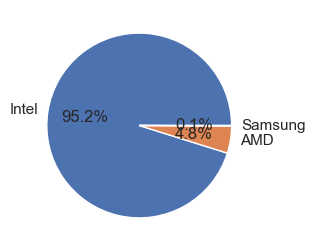

In [16]:
plt.pie(data, labels=data.index, autopct='%.1f%%');

### Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

#### 3.1 Постройте график в абсолютных величинах

In [17]:
data = pd.crosstab(index=df.Company, columns=df.Cpu_Company)
data = data.drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


In [18]:
nticks = np.arange(len(data.AMD))
nticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

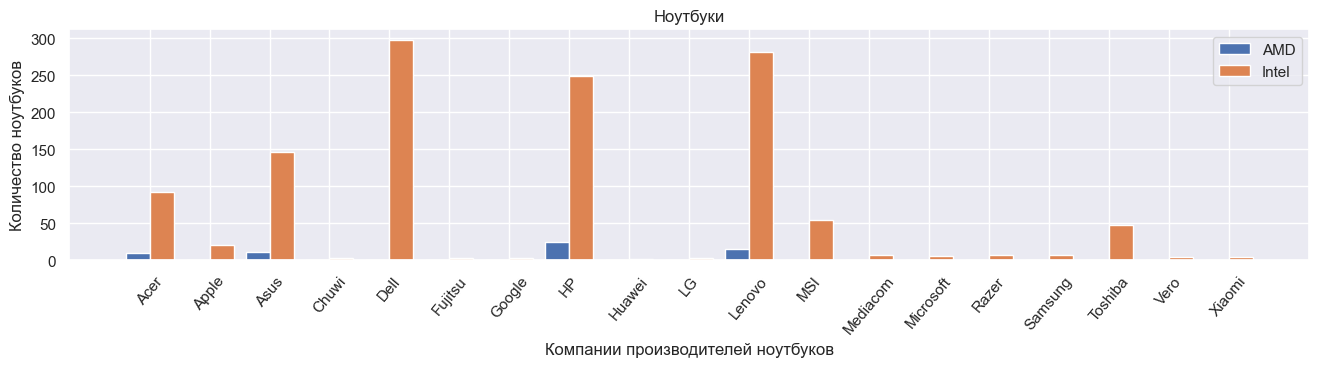

In [19]:
offset = 0.2
w=0.4
plt.bar(nticks-offset, data.AMD, width = w)
plt.bar(nticks+offset, data.Intel, width = w)
plt.title('Ноутбуки')
plt.xlabel('Компании производителей ноутбуков')
plt.ylabel('Количество ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(nticks, data.Company, rotation=50);


#### 3.2 Постройте график в относительных величинах

In [20]:
data = pd.crosstab(index=df.Company, columns=df.Cpu_Company, normalize='index')
data = data.drop(columns='Samsung').reset_index().round(2)
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.10,0.90
1,Apple,0.00,1.00
2,Asus,0.07,0.93
3,Chuwi,0.00,1.00
4,Dell,0.00,1.00
5,Fujitsu,0.00,1.00
6,Google,0.00,1.00
7,HP,0.09,0.91
8,Huawei,0.00,1.00
9,LG,0.00,1.00


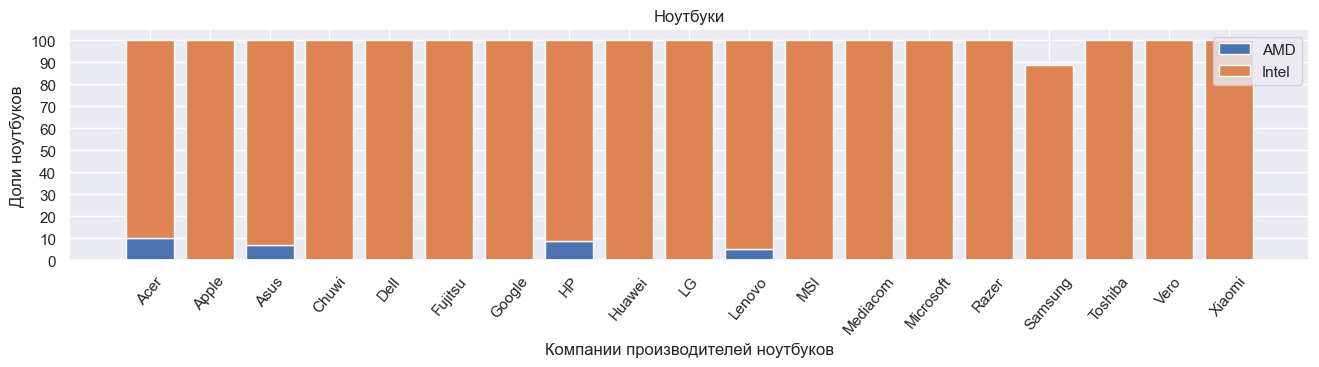

In [21]:

plt.bar(data.Company, data.AMD)
plt.bar(data.Company, data.Intel, bottom=data.AMD)
plt.title('Ноутбуки')
plt.xlabel('Компании производителей ноутбуков')
plt.ylabel('Доли ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks( rotation=50);
plt.yticks(np.arange(0, 1.1, 0.1), np.arange(0, 101, 10));


#### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

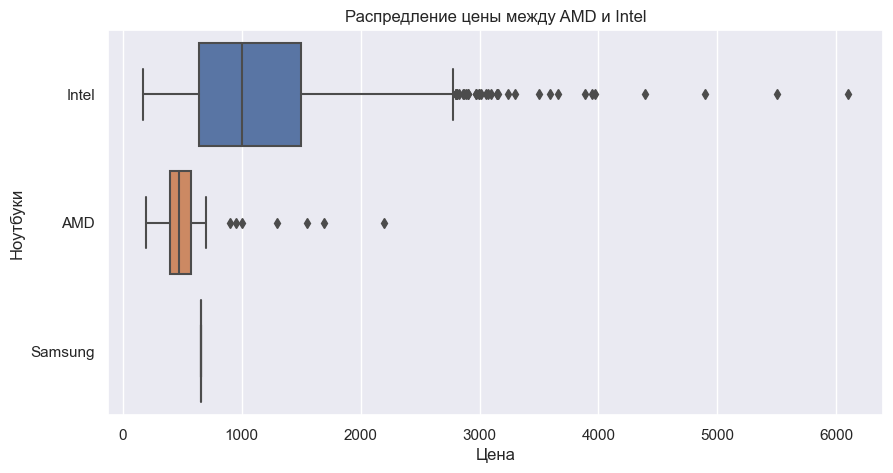

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Cpu_Company'], x=df['Price_euros'])
plt.title('Распредление цены между AMD и Intel')
plt.xlabel('Цена')
plt.ylabel('Ноутбуки');

#### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

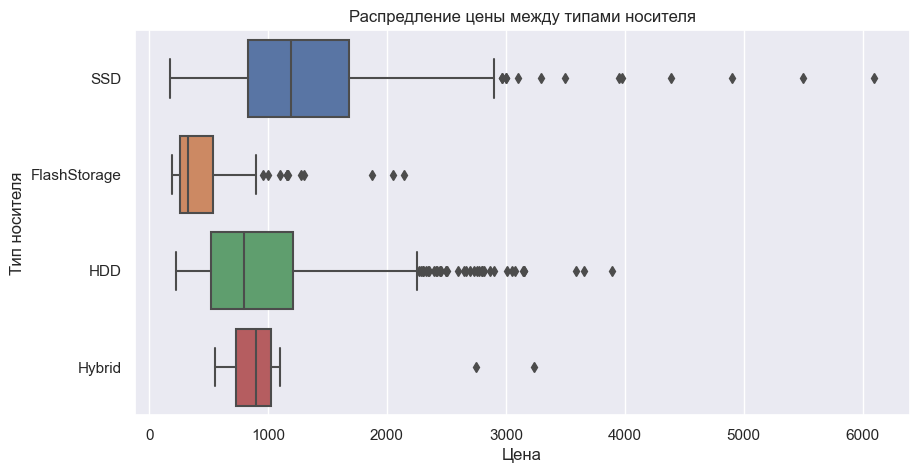

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Memory_Type'], x=df['Price_euros'])
plt.title('Распредление цены между типами носителя')
plt.xlabel('Цена')
plt.ylabel('Тип носителя');

#### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

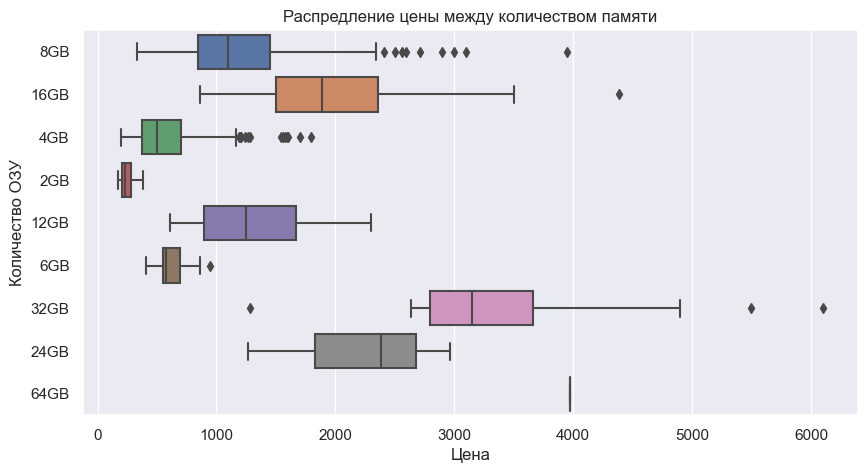

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Ram'], x=df['Price_euros'])
plt.title('Распредление цены между количеством памяти')
plt.xlabel('Цена')
plt.ylabel('Количество ОЗУ');

#### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

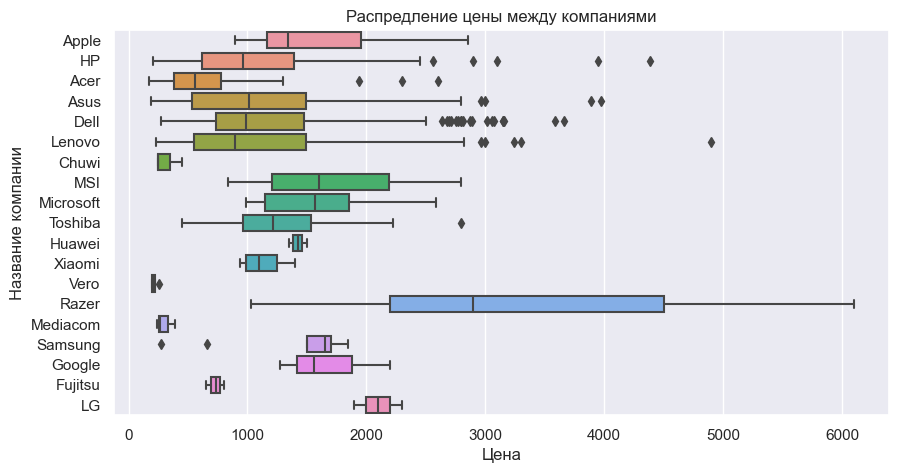

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Company'], x=df['Price_euros'])
plt.title('Распредление цены между компаниями')
plt.xlabel('Цена')
plt.ylabel('Название компании');

### Задание 5*.
#### Постройте матрицу корреляций для таблицы

In [26]:
df_corr = df[['Inches',	'Weight',	'Price_euros',	'Memory_Amount']].corr().round(2)
df_corr

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.07,0.27
Weight,0.83,1.00,0.21,0.18
Price_euros,0.07,0.21,1.00,-0.13
Memory_Amount,0.27,0.18,-0.13,1.00


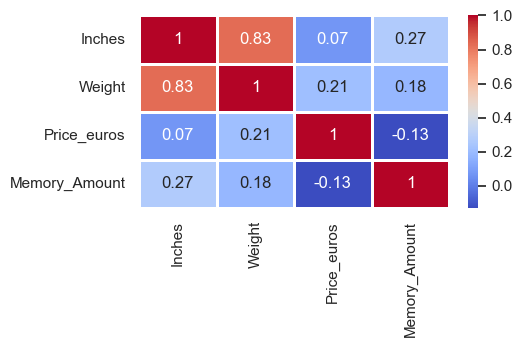

In [27]:
plt.figure(figsize=(5, 2.5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=1);